In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Calculate cumulative monthly sales_amount over the year (running total from Jan to Dec). Plot it as a line with markers, and add a secondary line for cumulative profit_amount on the same chart (use twin axis if needed).

In [ ]:
# monthly data
monthly_data=df.groupby('order_month')\
    .agg(
        total_sales=('sales_amount','sum'),
        total_profit=('profit_amount','sum')
        )\
        .sort_index().reset_index()

In [42]:
# cumulative sum

monthly_data['cum_sales']=monthly_data.total_sales.cumsum()
monthly_data['cum_profit']=monthly_data.total_profit.cumsum()
monthly_data


,order_month,total_sales,total_profit,cum_sales,cum_profit
0,1,1654681.16,366757.53,1654681.16,366757.53
1,2,1939979.89,436149.71,3594661.05,802907.24
2,3,1567266.29,349455.59,5161927.34,1152362.83
3,4,1342993.09,297055.91,6504920.43,1449418.74
4,5,1851977.57,426664.78,8356898.00,1876083.52
5,6,1129237.85,228461.03,9486135.85,2104544.55
6,7,1276039.54,273222.87,10762175.39,2377767.42
7,8,1930876.53,396568.74,12693051.92,2774336.16
8,9,1346434.58,294973.52,14039486.50,3069309.68
9,10,1774719.26,402545.35,15814205.76,3471855.03


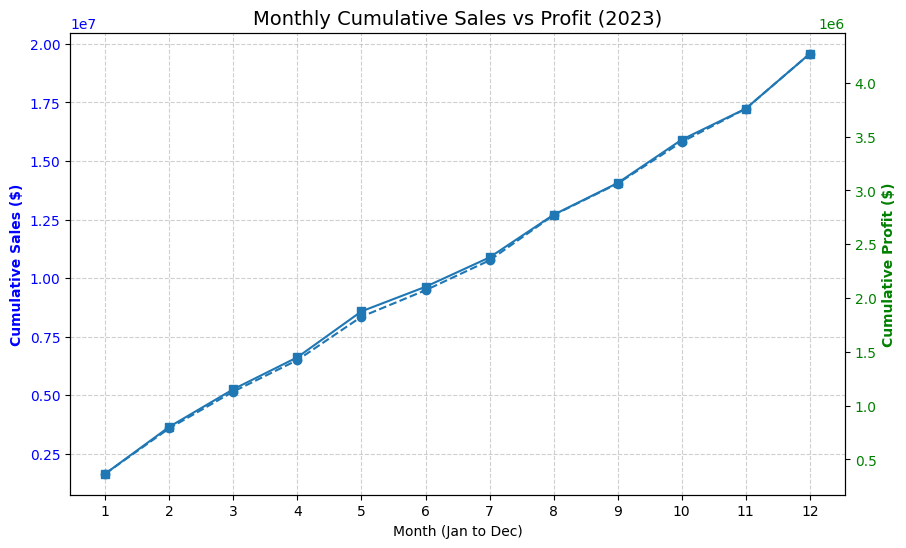

In [ ]:
# plotting

fig,ax1=plt.subplots(figsize=(10,6))

ax1.plot(
    monthly_data['order_month'],
    monthly_data['cum_sales'],
    marker='o',
    label='Cumulative Sales',
    linestyle='--'
)
ax1.set_xlabel('Month (Jan to Dec)')
ax1.set_ylabel('Cumulative Sales ($)', color='b', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2=ax1.twinx()

ax2.plot(
    monthly_data['order_month'],
    monthly_data['cum_profit'],
    marker='s',
    label='Cumulative Profit'
    )

ax2.set_ylabel('Cumulative Profit ($)', color='g', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='g')
plt.title('Monthly Cumulative Sales vs Profit', fontsize=14)
plt.xticks(range(1, 13)) # Ensure all 12 months show
plt.show()